In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib as mpl
import mpl_toolkits.axes_grid1 as axgrid
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pandas as pd
import nbodykit.lab as nb

import mpl_scatter_density
# Make the norm object to define the image stretch
from astropy.visualization import LogStretch
from astropy.visualization.mpl_normalize import ImageNormalize

# Matplotlib darkmode + color picker 
plt.style.use('light_mode')
mpl.rcParams['axes.linewidth'] = 3

import yaml
import io



In [17]:
# Read YAML file
with open("../config.yaml", 'r') as stream:
    config = yaml.safe_load(stream)
    
config

{'run_name': 'density_cube_snap_099_full_1024_all_species',
 'input_directory': '/global/cscratch1/sd/james12/Illustris_TNG_Data/TNG_Density_Cubes/simple_density_cubes/',
 'snapfile_root': 99,
 'num_snaps': 1,
 'output_directory': '/global/cscratch1/sd/james12/NEXUS_analysis/Full_Species_1024_snap_099/',
 'xmin': 0.0,
 'xmax': 205000.0,
 'num_scales': 10,
 'nx': 1024,
 'DM_particle_mass_TNG': 0.00398342749867548,
 'GAS_particle_mass_TNG': 0.000743736,
 'DM_particle_mass_Dark': 0.0047271638660809,
 'N_DM': 15625000000,
 'N_GAS': 15625000000,
 'algorithm': 'NEXUS+',
 'simulation_type': 'All'}

# Plot Power Spectra

In [65]:
dm_root_dir = "/global/cscratch1/sd/james12/NEXUS_analysis/DM_only_1024_snap_099/power_spectra/"
dm_run_name = "density_cube_snap_099_full_1024_dm"
full_root_dir = "/global/cscratch1/sd/james12/NEXUS_analysis/Full_Species_1024_snap_099/power_spectra/"
full_run_name = "density_cube_snap_099_full_1024_all_species"

# dm_only_pk_all = pd.read_csv(dm_root_dir + dm_run_name + "_pk_all.csv")
# dm_only_pk_clus = pd.read_csv(dm_root_dir + dm_run_name + "_pk_clus.csv")
# dm_only_pk_fil = pd.read_csv(dm_root_dir + dm_run_name + "_pk_fil.csv")
# dm_only_pk_wall = pd.read_csv(dm_root_dir + dm_run_name + "_pk_wall.csv")

# full_pk_all = pd.read_csv(full_root_dir + full_run_name + "_pk_all.csv")
# full_pk_clus = pd.read_csv(full_root_dir + full_run_name + "_pk_clus.csv")
# full_pk_fil = pd.read_csv(full_root_dir + full_run_name + "_pk_fil.csv")
# full_pk_wall = pd.read_csv(full_root_dir + full_run_name + "_pk_wall.csv")

dm_only_pk_all = (nb.FFTPower.load(dm_root_dir + dm_run_name + "_pk_all.json")).power
dm_only_pk_clus = (nb.FFTPower.load(dm_root_dir + dm_run_name + "_pk_clus.json")).power
dm_only_pk_fil = (nb.FFTPower.load(dm_root_dir + dm_run_name + "_pk_fil.json")).power
dm_only_pk_wall = (nb.FFTPower.load(dm_root_dir + dm_run_name + "_pk_wall.json")).power

full_pk_all = (nb.FFTPower.load(full_root_dir + full_run_name + "_pk_all.json")).power
full_pk_clus = (nb.FFTPower.load(full_root_dir + full_run_name + "_pk_clus.json")).power
full_pk_fil = (nb.FFTPower.load(full_root_dir + full_run_name + "_pk_fil.json")).power
full_pk_wall = (nb.FFTPower.load(full_root_dir + full_run_name + "_pk_wall.json")).power

/global/homes/j/james12/.conda/envs/baryon_env/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/global/homes/j/james12/.conda/envs/baryon_env/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/global/homes/j/james12/.conda/envs/baryon_env/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


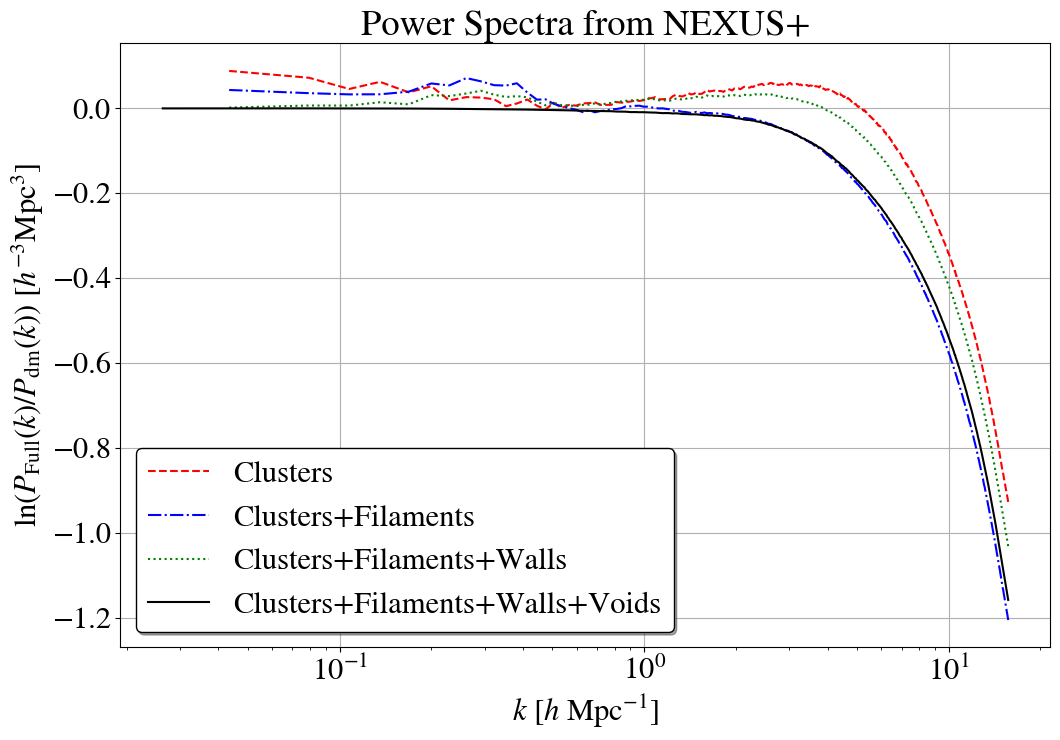

In [66]:
plt.figure(figsize=(12,8))
# plt.loglog((dm_only_pk_all['k']) * 1e3, (dm_only_pk_all['power'].real - dm_only_pk_all.attrs['shotnoise'])*1e-9, label='DM All Data', color="black", linestyle="--") #Illustris units are kpc we need to convert to Mpc
# plt.loglog((dm_only_pk_clus['k']) * 1e3, (dm_only_pk_clus['power'].real - dm_only_pk_clus.attrs['shotnoise'])*1e-9, label='DM Cluster', color="red", linestyle="--")
# plt.loglog((dm_only_pk_fil['k']) * 1e3, (dm_only_pk_fil['power'].real - dm_only_pk_fil.attrs['shotnoise'])*1e-9, label='DM Filament', color="blue", linestyle="-.")
# plt.loglog((dm_only_pk_wall['k']) * 1e3, (dm_only_pk_wall['power'].real - dm_only_pk_wall.attrs['shotnoise'])*1e-9, label='DM Wall', color="green", linestyle=":")

plt.plot((full_pk_clus['k']) * 1e3, np.log((((full_pk_clus['power'].real - full_pk_clus.attrs['shotnoise'])*1e-9) / 
                                       ((dm_only_pk_clus['power'].real - dm_only_pk_clus.attrs['shotnoise'])*1e-9))),
                                       label='Clusters', color="red", linestyle="--")
plt.plot((full_pk_fil['k']) * 1e3, np.log((((full_pk_fil['power'].real - full_pk_fil.attrs['shotnoise'])*1e-9) / 
                                      ((dm_only_pk_fil['power'].real - dm_only_pk_fil.attrs['shotnoise'])*1e-9))),
                                       label='Clusters+Filaments', color="blue", linestyle="-.")
plt.plot((full_pk_wall['k']) * 1e3, np.log((((full_pk_wall['power'].real - full_pk_wall.attrs['shotnoise'])*1e-9) / 
                                       ((dm_only_pk_wall['power'].real - dm_only_pk_wall.attrs['shotnoise'])*1e-9))),
                                        label='Clusters+Filaments+Walls', color="green", linestyle=":")
plt.plot((full_pk_all['k']) * 1e3, np.log((((full_pk_all['power'].real - full_pk_all.attrs['shotnoise'])*1e-9) / 
                                      ((dm_only_pk_all['power'].real - dm_only_pk_all.attrs['shotnoise'])*1e-9))),
                                       label='Clusters+Filaments+Walls+Voids', color="black") #Illustris units are kpc we need to convert to Mpc



plt.semilogx()
plt.grid()
plt.title("Power Spectra from NEXUS+")
plt.xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]")
plt.ylabel(r"ln$(P_{\mathrm{Full}}(k) / P_{\mathrm{dm}}(k)) $ [$h^{-3}\mathrm{Mpc}^3$]")
plt.legend(fontsize=22, shadow=True, edgecolor="black")
# plt.savefig("full_ratio_compare_pk_nexus_cumulative_log.png", format="png", dpi=300, bbox_inches="tight")
plt.show()

In [19]:
power_file = "/global/cscratch1/sd/james12/NEXUS_analysis/cross_power_2/cross_power"


dm_pk_all = (nb.FFTPower.load(power_file + "_pk_all_dm.json")).power
pk_clus = (nb.FFTPower.load(power_file + "_pk_clus.json")).power
pk_fil = (nb.FFTPower.load(power_file + "_pk_fil.json")).power
pk_wall = (nb.FFTPower.load(power_file + "_pk_wall.json")).power
full_pk_all = (nb.FFTPower.load(power_file + "_pk_all_full.json")).power


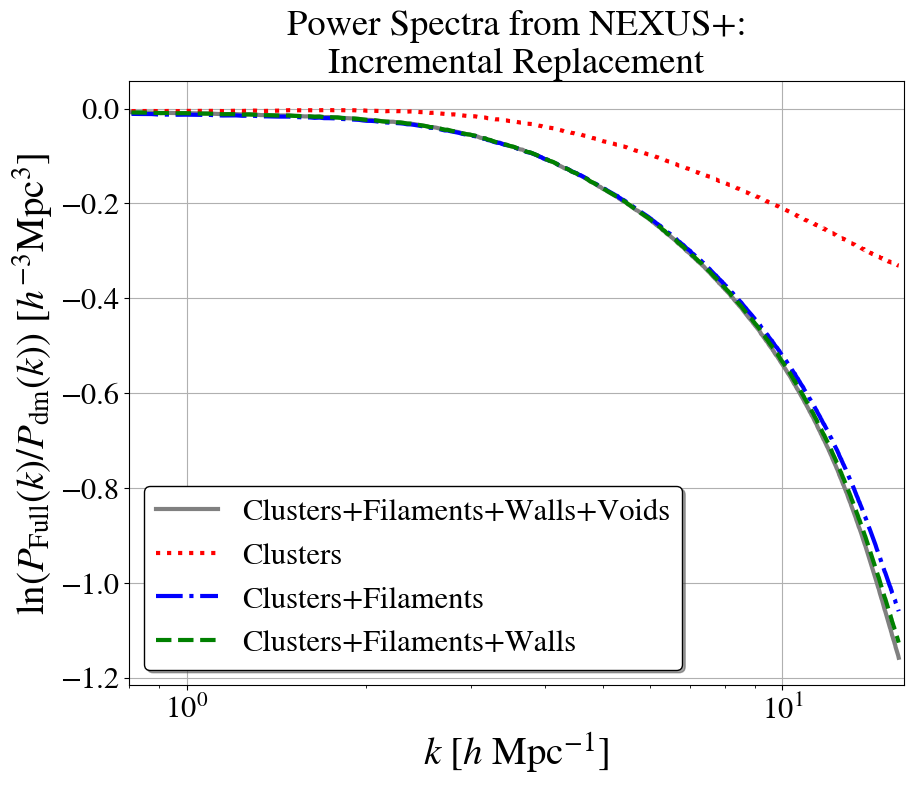

In [55]:
plt.figure(figsize=(10,8))

plt.plot((full_pk_all['k']) * 1e3, np.log((((full_pk_all['power'].real - full_pk_all.attrs['shotnoise'])*1e-9) / 
                                      ((dm_pk_all['power'].real - dm_pk_all.attrs['shotnoise'])*1e-9))),
                                       label='Clusters+Filaments+Walls+Voids', color="gray",linewidth=3) #Illustris units are kpc we need to convert to Mpc




plt.plot((pk_clus['k']) * 1e3, np.log((((pk_clus['power'].real - pk_clus.attrs['shotnoise'])*1e-9) / 
                                       ((dm_pk_all['power'].real - dm_pk_all.attrs['shotnoise'])*1e-9))),
                                       label='Clusters', color="red", linestyle=":", linewidth=3)

plt.plot((pk_fil['k']) * 1e3, np.log((((pk_fil['power'].real - pk_fil.attrs['shotnoise'])*1e-9) / 
                                      ((dm_pk_all['power'].real - dm_pk_all.attrs['shotnoise'])*1e-9))),
                                       label='Clusters+Filaments', color="blue", linestyle="-.",linewidth=3)

plt.plot((pk_wall['k']) * 1e3, np.log((((pk_wall['power'].real - pk_wall.attrs['shotnoise'])*1e-9) / 
                                       ((dm_pk_all['power'].real - dm_pk_all.attrs['shotnoise'])*1e-9))),
                                        label='Clusters+Filaments+Walls', color="green", linestyle="--",linewidth=3)



plt.semilogx()
plt.grid()
plt.xlim(0.8e0, 1.6e1)
plt.title("Power Spectra from NEXUS+:\nIncremental Replacement")
plt.xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]",fontsize=28)
plt.ylabel(r"ln$(P_{\mathrm{Full}}(k) / P_{\mathrm{dm}}(k)) $ [$h^{-3}\mathrm{Mpc}^3$]", fontsize=28)
plt.legend(fontsize=22, shadow=True, edgecolor="black")
# plt.tight_layout()
plt.savefig("incremental_replacement_pk.png", format="png", dpi=300, bbox_inches="tight")
plt.show()

In [31]:
import matplotlib as mpl

mpl.rcParams['axes.linewidth'] = 3 #set the value globally


/global/homes/j/james12/.conda/envs/baryon_env/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in true_divide
/global/homes/j/james12/.conda/envs/baryon_env/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide
/global/homes/j/james12/.conda/envs/baryon_env/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in true_divide


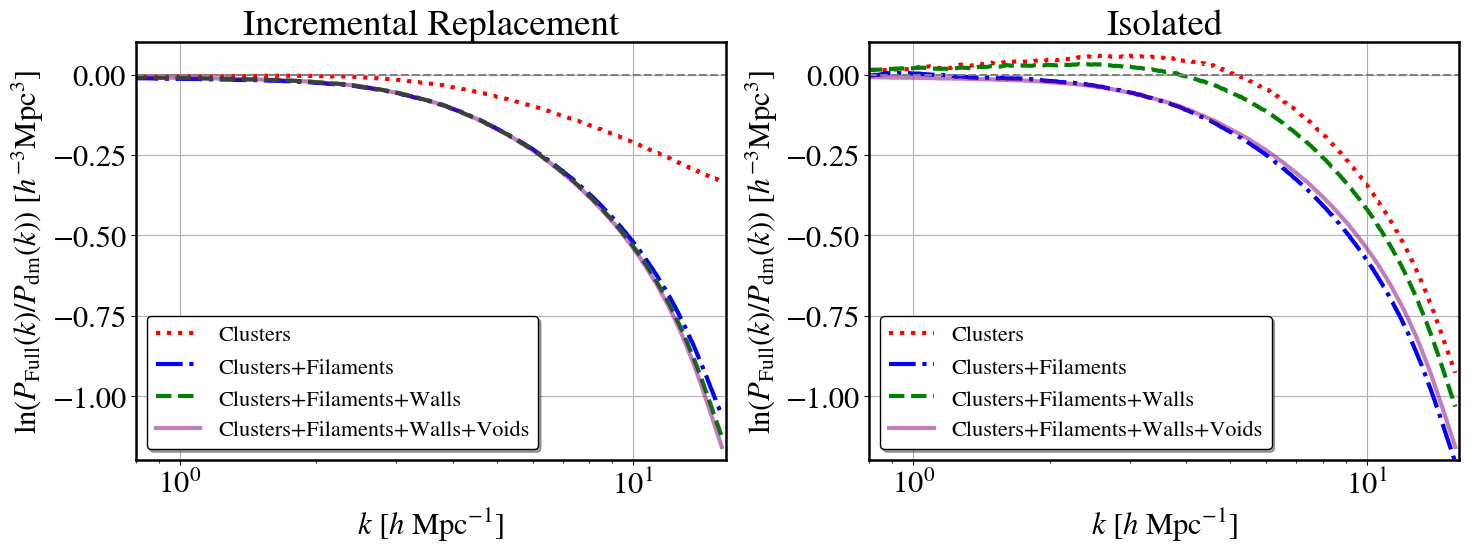

In [98]:
f, axes = plt.subplots(1,2, figsize=(15,6))


axes[0].plot((pk_clus['k']) * 1e3, np.log((((pk_clus['power'].real - pk_clus.attrs['shotnoise'])*1e-9) / 
                                       ((dm_pk_all['power'].real - dm_pk_all.attrs['shotnoise'])*1e-9))),
                                       label='Clusters', color="red", linestyle=":", linewidth=3)

axes[0].plot((pk_fil['k']) * 1e3, np.log((((pk_fil['power'].real - pk_fil.attrs['shotnoise'])*1e-9) / 
                                      ((dm_pk_all['power'].real - dm_pk_all.attrs['shotnoise'])*1e-9))),
                                       label='Clusters+Filaments', color="blue", linestyle="-.",linewidth=3)

axes[0].plot((pk_wall['k']) * 1e3, np.log((((pk_wall['power'].real - pk_wall.attrs['shotnoise'])*1e-9) / 
                                       ((dm_pk_all['power'].real - dm_pk_all.attrs['shotnoise'])*1e-9))),
                                        label='Clusters+Filaments+Walls', color="green", linestyle="--",linewidth=3)

axes[0].plot((full_pk_all['k']) * 1e3, np.log((((full_pk_all['power'].real - full_pk_all.attrs['shotnoise'])*1e-9) / 
                                      ((dm_pk_all['power'].real - dm_pk_all.attrs['shotnoise'])*1e-9))),
                                       label='Clusters+Filaments+Walls+Voids', color="purple",alpha=0.5,linewidth=3) #Illustris units are kpc we need to convert to Mpc



axes[0].semilogx()
axes[0].grid()
axes[0].set_xlim(0.8e0, 1.6e1)
axes[0].set_ylim(-1.2, 0.1)
axes[0].axhline(y = 0, color = 'gray', linestyle = '--')
axes[0].set_title("Incremental Replacement")
axes[0].set_xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]",fontsize=22)
axes[0].set_ylabel(r"ln$(P_{\mathrm{Full}}(k) / P_{\mathrm{dm}}(k)) $ [$h^{-3}\mathrm{Mpc}^3$]", fontsize=22)
axes[0].legend(fontsize=16, shadow=True, edgecolor="black")



axes[1].plot((full_pk_clus['k']) * 1e3, np.log((((full_pk_clus['power'].real - full_pk_clus.attrs['shotnoise'])*1e-9) / 
                                       ((dm_only_pk_clus['power'].real - dm_only_pk_clus.attrs['shotnoise'])*1e-9))),
                                       label='Clusters', color="red", linestyle=":",linewidth=3)
axes[1].plot((full_pk_fil['k']) * 1e3, np.log((((full_pk_fil['power'].real - full_pk_fil.attrs['shotnoise'])*1e-9) / 
                                      ((dm_only_pk_fil['power'].real - dm_only_pk_fil.attrs['shotnoise'])*1e-9))),
                                       label='Clusters+Filaments', color="blue", linestyle="-.",linewidth=3)
axes[1].plot((full_pk_wall['k']) * 1e3, np.log((((full_pk_wall['power'].real - full_pk_wall.attrs['shotnoise'])*1e-9) / 
                                       ((dm_only_pk_wall['power'].real - dm_only_pk_wall.attrs['shotnoise'])*1e-9))),
                                        label='Clusters+Filaments+Walls', color="green", linestyle="--",linewidth=3)
axes[1].plot((full_pk_all['k']) * 1e3, np.log((((full_pk_all['power'].real - full_pk_all.attrs['shotnoise'])*1e-9) / 
                                      ((dm_only_pk_all['power'].real - dm_only_pk_all.attrs['shotnoise'])*1e-9))),
                                       label='Clusters+Filaments+Walls+Voids', color="purple",alpha=0.5,linewidth=3) #Illustris units are kpc we need to convert to Mpc



axes[1].semilogx()
axes[1].grid()
axes[1].axhline(y = 0, color = 'gray', linestyle = '--')
axes[1].set_ylim(-1.2, 0.1)
axes[1].set_xlim(0.8e0, 1.6e1)
axes[1].set_title("Isolated")
axes[1].set_xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]")
axes[1].set_ylabel(r"ln$(P_{\mathrm{Full}}(k) / P_{\mathrm{dm}}(k)) $ [$h^{-3}\mathrm{Mpc}^3$]")
axes[1].legend(fontsize=16, shadow=True, edgecolor="black")


plt.tight_layout()
plt.savefig("full_pk_results.png", format="png", dpi=300, bbox_inches="tight")
plt.show()

In [18]:
power_file = "/global/cscratch1/sd/james12/NEXUS_analysis/cross_power_increment_final/cross_power"


dm_pk_all = (nb.FFTPower.load(power_file + "_pk_all_dm.json")).power
pk_clus = (nb.FFTPower.load(power_file + "_pk_clus.json")).power
pk_fil = (nb.FFTPower.load(power_file + "_pk_fil.json")).power
pk_wall = (nb.FFTPower.load(power_file + "_pk_wall.json")).power
full_pk_all = (nb.FFTPower.load(power_file + "_pk_all_full.json")).power


power_file = "/global/cscratch1/sd/james12/NEXUS_analysis/cross_power_isolated_final/cross_power"


dm_pk_all_iso = (nb.FFTPower.load(power_file + "_pk_all_dm.json")).power
pk_clus_iso = (nb.FFTPower.load(power_file + "_pk_clus.json")).power
pk_fil_iso = (nb.FFTPower.load(power_file + "_pk_fil.json")).power
pk_wall_iso = (nb.FFTPower.load(power_file + "_pk_wall.json")).power
full_pk_all_iso = (nb.FFTPower.load(power_file + "_pk_all_full.json")).power

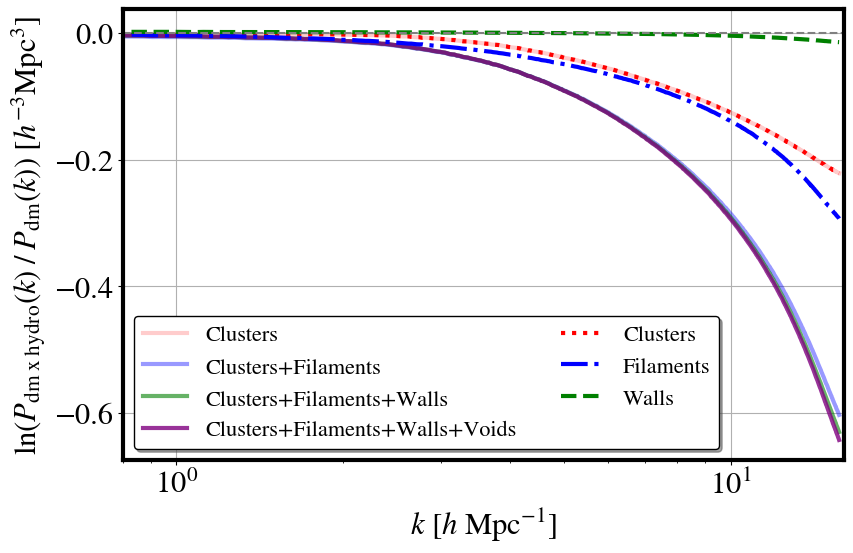

In [44]:
f, axes = plt.subplots(1,1, figsize=(9,6))






axes.plot((pk_clus['k']) * 1e3, np.log((((pk_clus['power'].real - pk_clus.attrs['shotnoise'])*1e-9) / 
                                       ((dm_pk_all['power'].real - dm_pk_all.attrs['shotnoise'])*1e-9))),
                                       label='Clusters', color="red", alpha=0.2,linestyle="-", linewidth=3)

axes.plot((pk_fil['k']) * 1e3, np.log((((pk_fil['power'].real - pk_fil.attrs['shotnoise'])*1e-9) / 
                                      ((dm_pk_all['power'].real - dm_pk_all.attrs['shotnoise'])*1e-9))),
                                       label='Clusters+Filaments', color="blue", alpha=0.4, linestyle="-",linewidth=3)

axes.plot((pk_wall['k']) * 1e3, np.log((((pk_wall['power'].real - pk_wall.attrs['shotnoise'])*1e-9) / 
                                       ((dm_pk_all['power'].real - dm_pk_all.attrs['shotnoise'])*1e-9))),
                                        label='Clusters+Filaments+Walls', color="green", alpha=0.6, linestyle="-",linewidth=3)

axes.plot((full_pk_all['k']) * 1e3, np.log((((full_pk_all['power'].real - full_pk_all.attrs['shotnoise'])*1e-9) / 
                                      ((dm_pk_all['power'].real - dm_pk_all.attrs['shotnoise'])*1e-9))),
                                       label='Clusters+Filaments+Walls+Voids', color="purple",alpha=0.8,linewidth=3) #Illustris units are kpc we need to convert to Mpc



axes.plot((pk_clus_iso['k']) * 1e3, np.log((((pk_clus_iso['power'].real - pk_clus_iso.attrs['shotnoise'])*1e-9) / 
                                       ((dm_pk_all_iso['power'].real - dm_pk_all_iso.attrs['shotnoise'])*1e-9))),
                                       label='Clusters', color="red", linestyle=":", linewidth=3)

axes.plot((pk_fil_iso['k']) * 1e3, np.log((((pk_fil_iso['power'].real - pk_fil_iso.attrs['shotnoise'])*1e-9) / 
                                      ((dm_pk_all_iso['power'].real - dm_pk_all_iso.attrs['shotnoise'])*1e-9))),
                                       label='Filaments', color="blue", linestyle="-.",linewidth=3)

axes.plot((pk_wall_iso['k']) * 1e3, np.log((((pk_wall_iso['power'].real - pk_wall_iso.attrs['shotnoise'])*1e-9) / 
                                       ((dm_pk_all_iso['power'].real - dm_pk_all_iso.attrs['shotnoise'])*1e-9))),
                                        label='Walls', color="green", linestyle="--",linewidth=3)

# axes.semilogx()
# axes.grid()
# # axes.set_xlim(0.8e0, 1.6e1)
# # axes.set_ylim(-0.8, 0.1)
# axes.axhline(y = 0, color = 'gray', linestyle = '--')
# axes.set_title("Incremental Replacement")
# axes.set_xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]",fontsize=22)
# axes.set_ylabel(r"ln$(P_{\mathrm{dm \; x \; hydro}}(k) \; / \; P_{\mathrm{dm}}(k)) $ [$h^{-3}\mathrm{Mpc}^3$]", fontsize=22)
# axes.legend(fontsize=16, shadow=True, edgecolor="black")


# axes[1].plot((full_pk_all_iso['k']) * 1e3, np.log((((full_pk_all_iso['power'].real - full_pk_all_iso.attrs['shotnoise'])*1e-9) / 
#                                       ((dm_pk_all_iso['power'].real - dm_pk_all_iso.attrs['shotnoise'])*1e-9))),
#                                        label='Clusters+Filaments+Walls+Voids', color="purple",alpha=0.5,linewidth=3) #Illustris units are kpc we need to convert to Mpc



axes.semilogx()
axes.grid()
axes.set_xlim(0.8e0, 1.6e1)
# axes.set_ylim(-0.8, 0.1)
axes.axhline(y = 0, color = 'gray', linestyle = '--')
# axes.set_title("Isolated Replacement")
axes.set_xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]",fontsize=22)
axes.set_ylabel(r"ln$(P_{\mathrm{dm \; x \; hydro}}(k) \; / \; P_{\mathrm{dm}}(k)) $ [$h^{-3}\mathrm{Mpc}^3$]", fontsize=22)
axes.legend(fontsize=16, shadow=True, ncol=2, edgecolor="black")

f.tight_layout()
plt.savefig("final_cross_correlation_plot.png", dpi=300)
